In [1]:
# Run Initial Preparation Notebook
# Run ML Preparation Notebook
%run app1_cust_seg_ml_prep.ipynb

Total Number of Duplicate Rows: 25876
ArrivalDateMonth: 12 unique values
Meal: 4 unique values
MarketSegment: 7 unique values
DistributionChannel: 4 unique values
ReservedRoomType: 7 unique values
AssignedRoomType: 8 unique values
DepositType: 3 unique values
CustomerType: 4 unique values
ReservationStatus: 3 unique values
['num__LeadTime' 'num__ArrivalDateYear' 'num__ArrivalDateMonth'
 'num__ArrivalDateWeekNumber' 'num__ArrivalDateDayOfMonth'
 'num__StaysInWeekendNights' 'num__StaysInWeekNights' 'num__Adults'
 'num__Children' 'num__Babies' 'num__Meal' 'num__MarketSegment'
 'num__DistributionChannel' 'num__IsRepeatedGuest'
 'num__PreviousCancellations' 'num__PreviousBookingsNotCanceled'
 'num__ReservedRoomType' 'num__AssignedRoomType' 'num__BookingChanges'
 'num__DepositType' 'num__DaysInWaitingList' 'num__CustomerType'
 'num__ADR' 'num__RequiredCarParkingSpaces' 'num__TotalOfSpecialRequests'
 'num__TotalStay' 'num__SpendingPerPerson' 'num__GroupType'
 'num__BookingUrgency' 'num__HighD

In [2]:
# Import Libraries
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

In [3]:
transformed_df  # Ready to Go Data

,num__LeadTime,num__ArrivalDateYear,num__ArrivalDateMonth,num__ArrivalDateWeekNumber,num__ArrivalDateDayOfMonth,num__StaysInWeekendNights,num__StaysInWeekNights,num__Adults,num__Children,num__Babies,num__Meal,num__MarketSegment,num__DistributionChannel,num__IsRepeatedGuest,num__PreviousCancellations,num__PreviousBookingsNotCanceled,num__ReservedRoomType,num__AssignedRoomType,num__BookingChanges,num__DepositType,num__DaysInWaitingList,num__CustomerType,num__ADR,num__RequiredCarParkingSpaces,num__TotalOfSpecialRequests,num__TotalStay,num__SpendingPerPerson,num__GroupType,num__BookingUrgency,num__HighDemand,num__LoyaltyScore,num__ChildRatio,num__Occupancy,num__WaitingTimeCategory,num__CancellationRisk
0,-0.956989,-1.873038,0.190283,0.031539,-1.669494,-1.040662,-0.180909,-1.844884,-0.246941,0.0,1.059910,-0.362871,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-2.992429,0.0,-0.883343,-0.678557,-2.258944,-1.418423,1.231519,-0.446099,0.0,-0.244706,-0.607990,-0.052977,-0.086395
1,0.177923,-1.873038,0.190283,0.031539,-1.669494,-1.040662,1.315280,0.139071,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-0.905175,0.0,0.362670,0.538868,-0.793491,-0.108003,-0.999357,-0.446099,0.0,-0.244706,-0.607990,-0.052977,-0.086395
2,-0.140406,-1.873038,0.190283,0.031539,-1.669494,-1.040662,1.315280,-1.844884,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-1.137092,0.0,0.362670,0.538868,0.346307,-1.418423,-0.999357,-0.446099,0.0,-0.244706,-1.041143,-0.052977,-0.086395
3,0.233284,-1.873038,0.190283,0.031539,-1.669494,1.343676,1.315280,0.139071,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-0.905175,0.0,1.608683,1.756292,-0.793491,-0.108003,-0.999357,2.241657,0.0,-0.244706,-0.896758,-0.052977,-0.086395
4,0.344007,-1.873038,0.190283,0.031539,-1.556199,-1.040662,-0.180909,0.139071,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-0.905175,0.0,0.362670,-0.678557,-0.793491,-0.108003,-0.999357,-0.446099,0.0,-0.244706,0.258314,-0.052977,-0.086395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43092,0.828421,1.132317,0.517523,0.624196,1.616073,1.343676,1.315280,2.123025,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,3.668695,3.142668,-0.36887,-0.103179,-0.054073,-0.103445,2.710003,0.0,-0.883343,1.756292,0.410161,2.512837,-0.999357,-0.446099,0.0,-0.244706,-0.607990,-0.052977,-0.086395
43093,1.229792,1.132317,0.517523,0.624196,1.729369,1.343676,1.315280,0.139071,-0.246941,0.0,-0.568486,-0.362871,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-0.602318,0.0,-0.883343,1.756292,-0.580856,-0.108003,-0.999357,-0.446099,0.0,-0.244706,-0.896758,-0.052977,-0.086395
43094,0.371688,1.132317,0.517523,0.624196,1.729369,1.343676,2.063375,2.123025,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,2.251058,1.864575,-0.36887,-0.103179,-0.054073,-0.103445,3.158285,0.0,1.608683,2.365004,0.619986,2.512837,-0.999357,2.241657,0.0,-0.244706,-0.731748,-0.052977,-0.086395
43095,0.468571,1.132317,0.517523,0.624196,1.729369,1.343676,2.063375,0.139071,-0.246941,0.0,-0.568486,0.543612,0.36699,0.0,-0.114531,-0.039132,-0.584216,-0.691612,-0.36887,-0.103179,-0.054073,-0.103445,-0.143941,0.0,-0.883343,2.365004,-0.259031,-0.108003,-0.999357,-0.446099,0.0,-0.244706,-0.979264,-0.052977,-0.086395


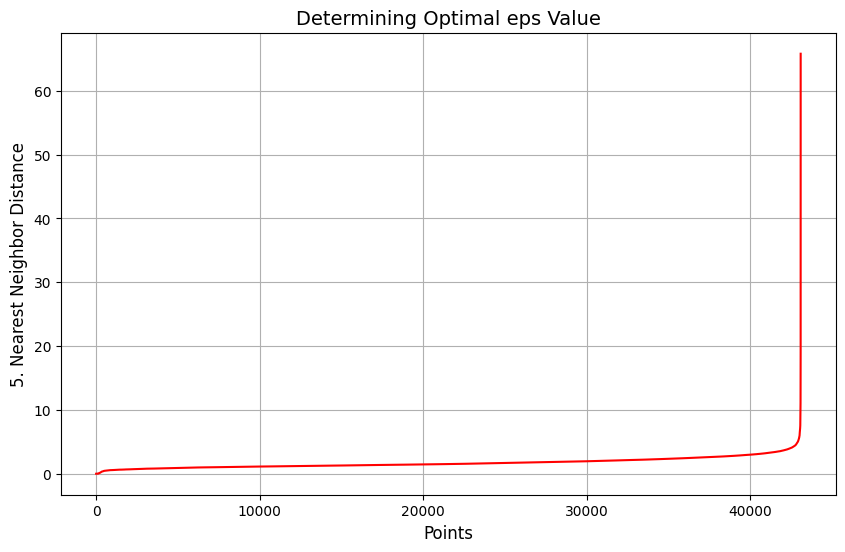

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find Optimal eps (Elbow)
nn = NearestNeighbors(n_neighbors=5)
nn.fit(transformed_df)
distances, _ = nn.kneighbors(transformed_df)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances, color="red")
plt.xlabel("Points", fontsize=12)
plt.ylabel(f"{5}. Nearest Neighbor Distance", fontsize=12)
plt.title("Determining Optimal eps Value", fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Epsilon value estimate from the graph (a value like ~7 can be suggested)
epsilon = 7
min_samples = 2 * transformed_df.shape[1]  # Twice the data size recommendation

# DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(transformed_df)

# Let's examine the general distribution of clusters
unique_clusters, cluster_counts = np.unique(dbscan_labels, return_counts=True)
unique_clusters, cluster_counts


(array([-1,  0,  1,  2,  3]), array([  262, 42022,   294,   447,    72]))

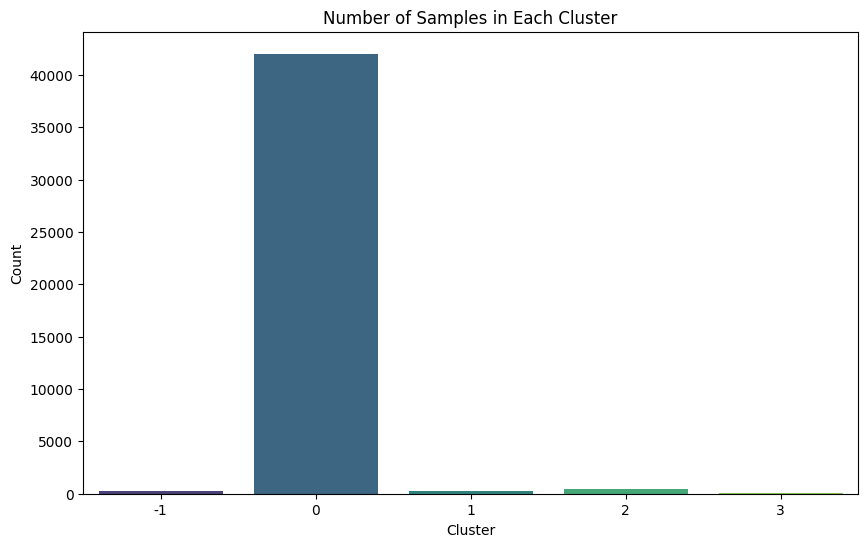

In [6]:
# Countplot for visualizing the number of samples in each cluster
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=dbscan_labels, data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [7]:
# Calculate silhouette score
silhouette_avg = silhouette_score(transformed_df, dbscan_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(transformed_df, dbscan_labels)
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(transformed_df, dbscan_labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

# Calculate noise ratio (assuming noise points are labeled as -1)
noise_ratio = (dbscan_labels == -1).sum() / len(dbscan_labels)
print(f'Noise Ratio: {noise_ratio}')

Silhouette Score: 0.4067999822672461
Davies-Bouldin Score: 1.3923515713830341
Calinski-Harabasz Score: 1486.6143455253489
Noise Ratio: 0.006079309464695919


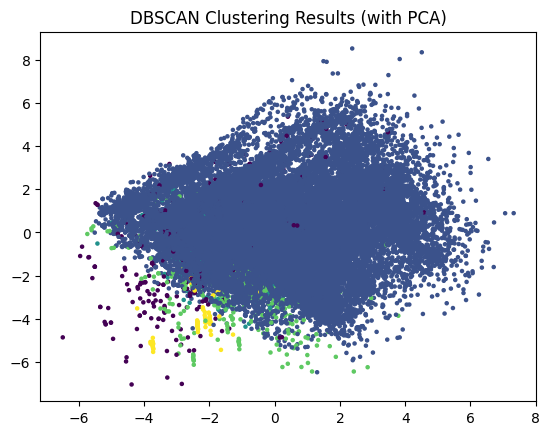

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df)

# Visualize clustering results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=5)
plt.title("DBSCAN Clustering Results (with PCA)")
plt.show()

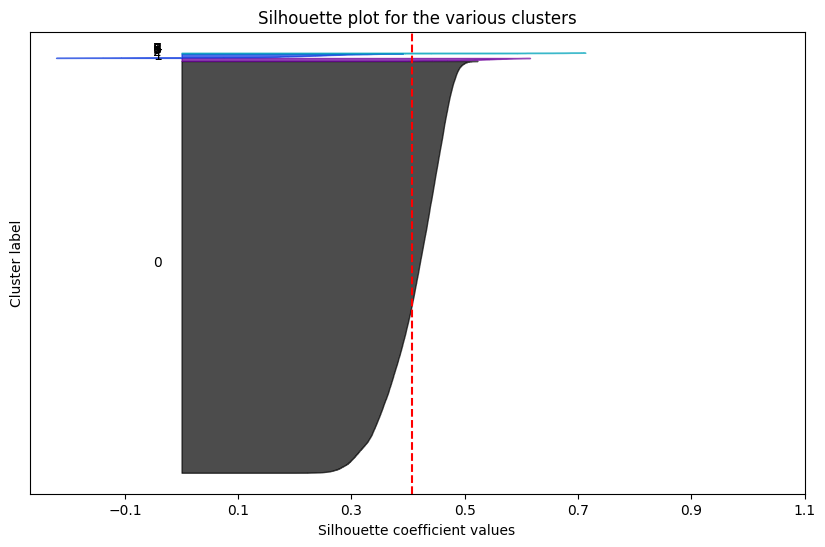

In [9]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(transformed_df, dbscan_labels)

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(9):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[dbscan_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 9)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.show()